In [1]:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
! pwd

Mounted at /content/Mdrive
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7


In [2]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import numpy as np
import math as math
from scipy import stats
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cio
import cartopy.feature as cfeature 
import xarray as xr
import numpy.ma as ma
import datetime as dt
import seaborn as sns
from datetime import datetime as dt
from datetime import timedelta as td
from pandas.core.indexes.interval import date_range
from scipy.stats.stats import chisquare
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669722 sha256=0a7f35692939ab4a3e0a8e8f4f1d9e61b0515aaa827794032385563c2097709a
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.3 MB/s 
  Installing build dependencies ... done

In [29]:
def valores (estacion):
  df1 = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = str(df1['NombreEstacion'][0])
  df1['IDEAM'] = df1['IDEAM'].astype('float')
  precipitacion = df1['IDEAM'].corr(df1['ERA5'],method='pearson')
  df = pd.read_excel(estacion,sheet_name='Temperatura')
  df['Minima'] = df['Minima'].astype('float')
  df['Maxima'] = df['Maxima'].astype('float')
  df['Era5_Minima'] = df['Era5_Minima'].astype('float')
  df['Era5_Maxima'] = df['Era5_Maxima'].astype('float')
  minima = df['Minima'].corr(df['Era5_Minima'],method='pearson')
  maxima = df['Maxima'].corr(df['Era5_Maxima'],method='pearson')
  print('Estacion',name+'\n Precipitación',precipitacion,'\n Mínima',minima,'\n Máxima',maxima)
  print('----------------------------------')

Andina

In [7]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA


In [12]:
valores('Botana_1990-2019.xlsx')
valores('LaJulia_1990-2019.xlsx')
valores('JardinBotanico_1990-2019.xlsx')
valores('Tibaitata_1990-2019.xlsx')
valores('Canafisanto_1990-2019.xlsx')
valores('APuertoBerrio_1990-2019.xlsx')
valores('ElCentro_1990-2019.xlsx')
valores('UIS_1990-2019.xlsx')
valores('Caseri_1990-2019.xlsx')
valores('AguasClaras_1990-2019.xlsx')
valores('SantaIsabel_1990-2019.xlsx')

Estacion BOTANA - AUT [52055210]
 Precipitación 0.42894339084641914 
 Mínima -0.09955914046087622 
 Máxima 0.08713910380944605
----------------------------------
Estacion JULIA LA [21135050]
 Precipitación -0.11577398651837897 
 Mínima 0.09411390879480407 
 Máxima 0.1617428189948532
----------------------------------
Estacion JARDIN BOTANICO  - AUT [21205710]
 Precipitación 0.11509272990935118 
 Mínima 0.060069238514487304 
 Máxima 0.08941262907909377
----------------------------------
Estacion TIBAITATA [21205420]
 Precipitación 0.28378899499702387 
 Mínima 0.3387417480358582 
 Máxima 0.12066804257515
----------------------------------
Estacion CANAFISANTO [26215020]
 Precipitación 0.46034656286478975 
 Mínima 0.03299260222681435 
 Máxima 0.02364698335978803
----------------------------------
Estacion AEROPUERTO PUERTO BERRIO [23095010]
 Precipitación 0.357879120463261 
 Mínima 0.014514807746002955 
 Máxima 0.032238974582212324
----------------------------------
Estacion CENTRO EL [23

Amazonia

In [27]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA/
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA


In [30]:
valores('Leticia_1990-2019.xlsx')
# valores('LaChorrera_1990-2019.xlsx')
# valores('PuertoLeguizamo_1990-2019.xlsx')
# valores('Mitu_1990-2019.xlsx')
# valores('Macagual_1990-2019.xlsx')
# valores('SanVicenteDelCaguan_1990-2019.xlsx')
# valores('SanJoseDelGuaviare_1990-2019.xlsx')
# valores('PuertoInirida_1990-2019.xlsx')

TypeError: ignored

Caribe

In [21]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE


In [22]:
valores('Turbo_1990-2019.xlsx')
valores('ElMellito_1990-2019.xlsx')
valores('Lorica_1990-2019.xlsx')
valores('LosAlamos_1990-2019.xlsx')
valores('Guaymaral_1990-2019.xlsx')
valores('EscuelaNavalCIOH_1990-2019.xlsx')
valores('LasFlores_1990-2019.xlsx')
valores('SanLorenzo_1990-2019.xlsx')
valores('Manaure_1990-2019.xlsx')

Estacion TURBO - AUT [12025040]
 Precipitación 0.32807920258454043 
 Mínima -0.14744060858327895 
 Máxima 0.037821024497465404
----------------------------------
Estacion MELLITO EL [12025030]
 Precipitación -0.024367728702991406 
 Mínima -0.17152552889216613 
 Máxima 0.09957540537996586
----------------------------------
Estacion LORICA  ITA - AUT [13085050]
 Precipitación 0.24257649154433145 
 Mínima 0.10250881944935321 
 Máxima 0.036252882576385294
----------------------------------
Estacion LOS ALAMOS - AUT [25025002]
 Precipitación 0.022573715879455652 
 Mínima 0.20078584375061415 
 Máxima 0.007494700010150238
----------------------------------
Estacion GUAYMARAL [28035040]
 Precipitación 0.2502771544449988 
 Mínima 0.22491608187477113 
 Máxima -0.08038088824336077
----------------------------------
Estacion ESCUELA NAVAL CIOH [14015030]
 Precipitación -0.07844730452307933 
 Mínima 0.1474782546594339 
 Máxima 0.04614332061587746
----------------------------------
Estacion FLORES L

Pacifica

In [19]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA


In [20]:
valores('ALaFlorida_1990-2019.xlsx')
valores('BajoCalima_1990-2019.xlsx')
valores('Noanama_1990-2019.xlsx')
valores('SanJosePalmar_1990-2019.xlsx')
valores('AElCarnaro_1990-2019.xlsx')
valores('Panamericana_1990-2019.xlsx')
valores('LaTeresita_1990-2019.xlsx')

Estacion AEROPUERTO LA FLORIDA [51035010]
 Precipitación 0.3123047100679098 
 Mínima 0.37225033300846655 
 Máxima -0.42005849862064804
----------------------------------
Estacion BAJO CALIMA [54075020]
 Precipitación 0.20688163123208894 
 Mínima -0.05276902582220446 
 Máxima 0.3541025120144546
----------------------------------
Estacion NOANAMA [54085010]
 Precipitación -0.006174873766825332 
 Mínima 0.27001672093587503 
 Máxima -0.04507619022160519
----------------------------------
Estacion SAN JOSE PALMAR [54025010]
 Precipitación 0.15868005412573657 
 Mínima 0.05705016742598109 
 Máxima -0.005714899867137752
----------------------------------
Estacion AEROPUERTO EL CARANO [11045010]
 Precipitación 0.41316279504295483 
 Mínima 0.31141516261234187 
 Máxima 0.38186445475814756
----------------------------------
Estacion PANAMERICANA [56015010]
 Precipitación 0.0778232798495655 
 Mínima -0.09253765851031921 
 Máxima 0.20964697939053561
----------------------------------
Estacion TERESI

Orinoquía

In [23]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA


In [24]:
valores('LaCooperativa_1990-2019.xlsx')
valores('LasGaviotas_1990-2019.xlsx')
valores('Modulos_1990-2019.xlsx')
valores('AYopal_1990-2019.xlsx')
valores('APuertoCarreno_1990-2019.xlsx')
valores('Tame_1990-2019.xlsx')
valores('Saravena_1990-2019.xlsx')
valores('ASantiagoPerez_1990-2019.xlsx')

Estacion COOPERATIVA LA [32075060]
 Precipitación 0.7519452754427072 
 Mínima -0.040120760319250895 
 Máxima 0.16205742640140736
----------------------------------
Estacion LAS GAVIOTAS [34015010]
 Precipitación 0.6393061907298812 
 Mínima -5.4063255958447126e-05 
 Máxima 0.05753389294118318
----------------------------------
Estacion MODULOS - AUT [35225030]
 Precipitación 0.24652732907139488 
 Mínima -0.04521420948489428 
 Máxima -0.07971615827545567
----------------------------------
Estacion AEROPUERTO YOPAL - AUT [35215020]
 Precipitación 0.021873858164715793 
 Mínima -0.11533573179644557 
 Máxima -0.30404384846138977
----------------------------------
Estacion AEROPUERTO PUERTO CARRENO [38015030]
 Precipitación 0.8380764129309114 
 Mínima 0.06493352005634391 
 Máxima -0.14047026047614528
----------------------------------
Estacion TAME [36025010]
 Precipitación 0.18181076478261377 
 Mínima 0.03161466464765669 
 Máxima -0.07554833132215123
----------------------------------
Estaci

Insular

In [25]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR


In [26]:
valores('Gorgona_1990-2019.xlsx')
valores('Malpelo_1990-2019.xlsx')
valores('IslasDelRosario_1990-2019.xlsx')
valores('ASesquicentenario_1990-2019.xlsx')
valores('AElEmbrujo_1990-2019.xlsx')

Estacion GORGONA GUAPI [57025020]
 Precipitación 0.25141692942017846 
 Mínima 0.08415895027110618 
 Máxima 0.2408772667059201
----------------------------------
Estacion MALPELO  - AUT  [57015010]
 Precipitación 0.0064453012865810285 
 Mínima 0.04198967937079013 
 Máxima -0.22142062475716934
----------------------------------
Estacion ISLAS DEL ROSARIO [14015060]
 Precipitación 0.7611465297177308 
 Mínima 0.06139593429410315 
 Máxima -0.1746173694035462
----------------------------------
Estacion AEROPUERTO SESQUICENTENARIO [17015010]
 Precipitación 0.7578337687319435 
 Mínima 0.11800606984926505 
 Máxima -0.009306129455618574
----------------------------------
Estacion AEROPUERTO EL EMBRUJO [17025020]
 Precipitación 0.7519508332514586 
 Mínima 0.03685703776436426 
 Máxima 0.12356965184562908
----------------------------------


In [35]:
from sklearn.metrics import mean_squared_error
import datetime as datetime

In [ ]:
def corr(estacion):
  #PRECIPITACIÓN:
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = df['NombreEstacion'][0]
  name = str(name)
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m')
  start = df['Fecha'][0]
  result = [start]
  #Rango de horas
  for i in range(1, len(df['Fecha'])):
      start += td(seconds=3600)
      result.append(start)
  #df de prueba
  prueba = pd.DataFrame({'dates': result})
  df['Año'] = df['Fecha'].dt.year
  df['Meses'] = df['Fecha'].dt.month
  era_ = []
  for i in df.groupby([('Año'),('Meses')])['ERA5']:
    era_.append(i[1:])
  era = np.array(era_)
  ideam_ = []
  for i in df.groupby([('Año'),('Meses')])['IDEAM']:
    ideam_.append(i[1:])
  ideam = np.array(ideam_)
  #PRINTS
  corr_p = stats.pearsonr(ideam[:,0,0],era[:,0,0])
  print('corr_p',corr_p[0])
  return

In [37]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA


In [256]:
def ideam(estacion):
  df=pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = str(df['NombreEstacion'][0])
  df = pd.read_excel(estacion,sheet_name='Temperatura')
  df['Fecha_Maxima'] = pd.to_datetime(df['Fecha_Maxima'], format='%Y-%m')
  df['Fecha_Minima'] = pd.to_datetime(df['Fecha_Minima'], format='%Y-%m')
#-------    
  # MÁXIMAS:
  df['Año'] = df['Fecha_Maxima'].dt.year
  df['Meses'] = df['Fecha_Maxima'].dt.month
  df['Dias'] = df['Fecha_Maxima'].dt.day
  max = []
  for i in df.groupby([('Año'),('Meses')])['Maxima'].max():
    max.append(i)
  max = np.array(max)
  fecha_max = []
  for i in df.groupby([('Año'),('Meses')])['Fecha_Maxima'].min():
    fecha_max.append(i)
  maximo = {'Fecha_Maxima':fecha_max,'Maxima':max}
  maximo = pd.DataFrame(maximo)
# #------
  #MÍNIMAS
  df['Año'] = df['Fecha_Minima'].dt.year
  df['Meses'] = df['Fecha_Minima'].dt.month
  df['Dias'] = df['Fecha_Minima'].dt.day
  min = []
  for i in df.groupby([('Año'),('Meses')])['Minima'].min():
    min.append(i)
  min = np.array(min)
  fecha_min = []
  for i in df.groupby([('Año'),('Meses')])['Fecha_Minima'].min():
    fecha_min.append(i)
  minimo = {'Fecha_Minima':fecha_min,'Minimo':min}
  minimo = pd.DataFrame(minimo)
  maximo.to_excel(name+'.xlsx')
  minimo.to_excel(name+'1.xlsx')
# #------

In [265]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA


In [250]:
def valores (estacion):
  df = pd.read_excel(estacion,sheet_name='Temperatura')
  minima = df['Minima'].corr(df['Era5_Minima'],method='pearson')
  maxima = df['Maxima'].corr(df['Era5_Maxima'],method='pearson')
  df1 = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  precipitacion = df1['IDEAM'].corr(df1['ERA5'],method='pearson')
  print('Mínima',minima,'\n Máxima',maxima,'\n Precipitación',precipitacion)

Mínima 0.014514807746002955 
 Máxima 0.032238974582212324


In [252]:
df1 = pd.read_excel('APuertoBerrio_1990-2019.xlsx',sheet_name='Precipitacion_Total_Mensual')
df1

CodigoEstacion                       NombreEstacion  Latitud   Longitud  \
0        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
1        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
2        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
3        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
4        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
..              ...                                  ...      ...        ...   
355             NaN                                  NaN      NaN        NaN   
356             NaN                                  NaN      NaN        NaN   
357             NaN                                  NaN      NaN        NaN   
358             NaN                                  NaN      NaN        NaN   
359             NaN                                  NaN      NaN        NaN   

     Altitud Departamento       Municipio    IdParametro   Etiqueta  \
0      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
1      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
2      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
3      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
4      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
..       ...          ...             ...            ...        ...   
355      NaN          NaN             NaN            NaN        NaN   
356      NaN          NaN             NaN            NaN        NaN   
357      NaN          NaN             NaN            NaN        NaN   
358      NaN          NaN             NaN            NaN        NaN   
359      NaN          NaN             NaN            NaN        NaN   

                 DescripcionSerie Frecuencia      Fecha  IDEAM        ERA5  \
0    PrecipitaciÃ³n total mensual    Mensual 1990-01-01  132.6   50.802689   
1    PrecipitaciÃ³n total mensual    Mensual 1990-02-01   37.7   59.788572   
2    PrecipitaciÃ³n total mensual    Mensual 1990-03-01  194.1   91.944516   
3    PrecipitaciÃ³n total mensual    Mensual 1990-04-01  262.9  195.781177   
4    PrecipitaciÃ³n total mensual    Mensual 1990-05-01  266.3   80.970341   
..                            ...        ...        ...    ...         ...   
355                           NaN        NaN        NaT    NaN    3.841143   
356                           NaN        NaN        NaT    NaN   57.789031   
357                           NaN        NaN        NaT    NaN   85.885799   
358                           NaN        NaN        NaT    NaN   83.233803   
359                           NaN        NaN        NaT    NaN   52.561638   

          Fera  
0   1990-01-01  
1   1990-02-01  
2   1990-03-01  
3   1990-04-01  
4   1990-05-01  
..         ...  
355 2019-08-01  
356 2019-09-01  
357 2019-10-01  
358 2019-11-01  
359 2019-12-01  

[360 rows x 15 columns]

In [254]:
precipitacion = df1['IDEAM'].corr(df1['ERA5'],method='pearson')
print('Precipitacion',precipitacion)

Precipitacion 0.357879120463261


In [243]:
df1.dropna(how='any',axis=0,inplace=True)
ideam = df1['IDEAM']
era5 = df1['ERA5']
print(np.shape(ideam))
print(np.corrcoef(ideam,era5))

(283,)
[[1.         0.35787912]
 [0.35787912 1.        ]]


In [247]:
df1 = pd.read_excel('APuertoBerrio_1990-2019.xlsx',sheet_name='Precipitacion_Total_Mensual')
df1

CodigoEstacion                       NombreEstacion  Latitud   Longitud  \
0        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
1        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
2        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
3        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
4        23095010.0  AEROPUERTO PUERTO BERRIO [23095010]    6.465 -74.412222   
..              ...                                  ...      ...        ...   
355             NaN                                  NaN      NaN        NaN   
356             NaN                                  NaN      NaN        NaN   
357             NaN                                  NaN      NaN        NaN   
358             NaN                                  NaN      NaN        NaN   
359             NaN                                  NaN      NaN        NaN   

     Altitud Departamento       Municipio    IdParametro   Etiqueta  \
0      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
1      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
2      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
3      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
4      150.0    Antioquia  Puerto BerrÃ­o  PRECIPITACION  PTPM_TT_M   
..       ...          ...             ...            ...        ...   
355      NaN          NaN             NaN            NaN        NaN   
356      NaN          NaN             NaN            NaN        NaN   
357      NaN          NaN             NaN            NaN        NaN   
358      NaN          NaN             NaN            NaN        NaN   
359      NaN          NaN             NaN            NaN        NaN   

                 DescripcionSerie Frecuencia      Fecha  IDEAM        ERA5  \
0    PrecipitaciÃ³n total mensual    Mensual 1990-01-01  132.6   50.802689   
1    PrecipitaciÃ³n total mensual    Mensual 1990-02-01   37.7   59.788572   
2    PrecipitaciÃ³n total mensual    Mensual 1990-03-01  194.1   91.944516   
3    PrecipitaciÃ³n total mensual    Mensual 1990-04-01  262.9  195.781177   
4    PrecipitaciÃ³n total mensual    Mensual 1990-05-01  266.3   80.970341   
..                            ...        ...        ...    ...         ...   
355                           NaN        NaN        NaT    NaN    3.841143   
356                           NaN        NaN        NaT    NaN   57.789031   
357                           NaN        NaN        NaT    NaN   85.885799   
358                           NaN        NaN        NaT    NaN   83.233803   
359                           NaN        NaN        NaT    NaN   52.561638   

          Fera  
0   1990-01-01  
1   1990-02-01  
2   1990-03-01  
3   1990-04-01  
4   1990-05-01  
..         ...  
355 2019-08-01  
356 2019-09-01  
357 2019-10-01  
358 2019-11-01  
359 2019-12-01  

[360 rows x 15 columns]

In [ ]:
def precipitacion (estacion):
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = df['NombreEstacion'][0]
  name = str(name)
  #Datos Brutos
  print('DATOS BRUTOS')
  print('-------------------------------------------')
  fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, figsize=(12, 6))
  df = pd.read_excel(estacion,sheet_name='ERA5_P')
  #Plots
  ax1.plot(df['Tiempo'],df['Valores'],'.',color='midnightblue',linestyle='--')
  ax1.set_ylim(-2,top=None)
  ax1.set_ylabel('Precipitación total mensual (mm)')
  ax1.set_title('Datos brutos de la estación '+name)
  #--
  df1 = pd.read_excel(estacion,sheet_name='ERA5_T')
  ax2.plot(df1['Tiempo'],df1['Valores'],'.',color='red',linestyle='--')
  ax2.set_xlabel('Total de horas')
  ax2.set_ylabel('Temperatura (°C)')
  plt.show()

  #Climatología
  print('----------------------------------')
  print('CLIMATOLOGÍA')
  df2 = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  Enero = []
  Febrero = []
  Marzo = []
  Abril = []
  Mayo = []
  Junio = []
  Julio = []
  Agosto = []
  Septiembre = []
  Octubre = []
  Noviembre = []
  Diciembre = []
  m1 = df2.loc[(df2['Fecha'].dt.month==1)]
  m1 = pd.DataFrame(m1)
  m2 = df2.loc[(df2['Fecha'].dt.month==2)]
  m2 = pd.DataFrame(m2)
  m3 = df2.loc[(df2['Fecha'].dt.month==3)]
  m3 = pd.DataFrame(m3)
  m4 = df2.loc[(df2['Fecha'].dt.month==4)]
  m4 = pd.DataFrame(m4)
  m5 = df2.loc[(df2['Fecha'].dt.month==5)]
  m5 = pd.DataFrame(m5)
  m6 = df2.loc[(df2['Fecha'].dt.month==6)]
  m6 = pd.DataFrame(m6)
  m7 = df2.loc[(df2['Fecha'].dt.month==7)]
  m7 = pd.DataFrame(m7)
  m8 = df2.loc[(df2['Fecha'].dt.month==8)]
  m8 = pd.DataFrame(m8)
  m9 = df2.loc[(df2['Fecha'].dt.month==9)]
  m9 = pd.DataFrame(m9)
  m10 = df2.loc[(df2['Fecha'].dt.month==10)]
  m10 = pd.DataFrame(m10)
  m11 = df2.loc[(df2['Fecha'].dt.month==11)]
  m11 = pd.DataFrame(m11)
  m12 = df2.loc[(df2['Fecha'].dt.month==12)]
  m12 = pd.DataFrame(m12)
  m1
  Enero.append(m1['ERA5'].mean())
  Enero.append(m1['IDEAM'].mean())
  Febrero.append(m2['ERA5'].mean())
  Febrero.append(m2['IDEAM'].mean())
  Marzo.append(m3['ERA5'].mean())
  Marzo.append(m3['IDEAM'].mean())
  Abril.append(m4['ERA5'].mean())
  Abril.append(m4['IDEAM'].mean())
  Mayo.append(m5['ERA5'].mean())
  Mayo.append(m5['IDEAM'].mean())
  Junio.append(m6['ERA5'].mean())
  Junio.append(m6['IDEAM'].mean())
  Julio.append(m7['ERA5'].mean())
  Julio.append(m7['IDEAM'].mean())
  Agosto.append(m8['ERA5'].mean())
  Agosto.append(m8['IDEAM'].mean())
  Septiembre.append(m9['ERA5'].mean())
  Septiembre.append(m9['IDEAM'].mean())
  Octubre.append(m10['ERA5'].mean())
  Octubre.append(m10['IDEAM'].mean())
  Noviembre.append(m11['ERA5'].mean())
  Noviembre.append(m11['IDEAM'].mean())
  Diciembre.append(m12['ERA5'].mean())
  Diciembre.append(m12['IDEAM'].mean())
  Promedios1 = []
  Promedios1.extend([Enero[0],Febrero[0],Marzo[0],Abril[0],Mayo[0],Junio[0],Julio[0],Agosto[0],Septiembre[0],Octubre[0],Noviembre[0],Diciembre[0]])
  Promedios2 = []
  Promedios2.extend([Enero[1],Febrero[1],Marzo[1],Abril[1],Mayo[1],Junio[1],Julio[1],Agosto[1],Septiembre[1],Octubre[1],Noviembre[1],Diciembre[1]])
  meses = np.arange(1,13)
  fig,ax3 = plt.subplots(nrows=1,ncols=1, figsize=(10, 4))
  ax3.plot(meses,Promedios1,'or',linestyle='--',label='ERA5')
  ax3.plot(meses,Promedios2,'ob',linestyle='--',label='IDEAM')
  ax3.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
  ax3.set_xlabel('Número de mes')
  ax3.set_ylabel('Precipitación media mensual (mm)')
  ax3.set_title('Climatología de '+name)
  ax3.legend()
  plt.show()
  #Nube de puntos
  print('----------------------------------')
  print('NUBE DE PUNTOS')
  ejex = df2['IDEAM']
  ejey = df2['ERA5']
  fig,ax4 = plt.subplots(nrows=1,ncols=1, figsize=(3, 6))
  ax4.scatter(ejex,ejey,color='indigo',marker='.')
  ax4.set_xlabel('IDEAM (mm)')
  ax4.set_ylabel('ERA5 (mm)')
  ax4.set_title('Estación '+name)
  plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ti
      labelbottom=False)
  plt.tick_params(
      axis='y',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False)
  plt.show()

In [ ]:
def temperatura(estacion):
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = df['NombreEstacion'][0]
#------
  #MÍNIMAS:
  df = pd.read_excel(estacion,sheet_name='Temperatura')
  df['Fecha_Maxima'] = pd.to_datetime(df['Fecha_Maxima'], format='%Y-%m')
  df['Fecha_Minima'] = pd.to_datetime(df['Fecha_Minima'], format='%Y-%m')
  start = df['Fecha_Minima'][0]
  result = [start]
  #Rango de horas
  for i in range(1, len(df['Fecha_Minima'])):
      start += td(seconds=3600)
      result.append(start)
  #df de prueba
  prueba = pd.DataFrame({'dates': result})
  df['Año'] = df['Fecha_Minima'].dt.year
  df['Meses'] = df['Fecha_Minima'].dt.month
  df['Dias'] = df['Fecha_Minima'].dt.day
  min = []
  for i in df.groupby([('Año'),('Meses')])['Minima'].min():
    min.append(i)
  x1 = range(0,len(min))
#-------    
  # MÁXIMAS:
  start = df['Fecha_Maxima'][0]
  result = [start]
  #Rango de horas
  for i in range(1, len(df['Fecha_Maxima'])):
      start += td(seconds=3600)
      result.append(start)
  #df de prueba
  prueba = pd.DataFrame({'dates': result})
  df['Año'] = df['Fecha_Minima'].dt.year
  df['Meses'] = df['Fecha_Minima'].dt.month
  df['Dias'] = df['Fecha_Minima'].dt.day
  max = []
  for i in df.groupby([('Año'),('Meses')])['Maxima'].max():
    max.append(i)
  x2 = range(0,len(max))
  x3 = range(0,len(df['Fera']))
#-------
  #PLOTS
  print('TEMPERATURAS')
  print('-------------------------------------------')
  fig,ax1 = plt.subplots(nrows=1,ncols=1, figsize=(12, 8))
  #Plots
  ax1.plot(x1,min,'.',color='darkgreen',linestyle='-',label='Mínima IDEAM')
  ax1.plot(x3,df['Era5_Minima'],'.',color='lime',linestyle='-',label='Mínima ERA5')
  ax1.plot(x2,max,'.',color='red',linestyle='-',label='Máxima IDEAM')
  ax1.plot(x3,df['Era5_Maxima'],'.',color='darkorange',linestyle='-',label='Máxima ERA5')
  ax1.set_xlabel('Meses')
  ax1.set_ylabel('Temperatura (°C)')
  ax1.set_title('Temperaturas mínimas y máximas, ERA5 - IDEAM, estación '+name)
  ax1.plot()
  ax1.legend(loc='upper right')
  plt.show()

  print('---------------------------')
  #CLIMATOLOGÍA
  print('Climatología')
#------
  #MÍNIMAS:
  start = df['Fecha_Minima'][0]
  result = [start]
  #Rango de horas
  for i in range(1, len(df['Fecha_Minima'])):
      start += td(seconds=3600)
      result.append(start)
  #df de prueba
  prueba = pd.DataFrame({'dates': result})
  df['Año'] = df['Fecha_Minima'].dt.year
  df['Meses'] = df['Fecha_Minima'].dt.month
  df['Dias'] = df['Fecha_Minima'].dt.day
  min = []
  for i in df.groupby('Meses')['Minima'].mean():
    min.append(i)
#-------    
  # MÁXIMAS:
  start = df['Fecha_Maxima'][0]
  result = [start]
  #Rango de horas
  for i in range(1, len(df['Fecha_Maxima'])):
      start += td(seconds=3600)
      result.append(start)
  #df de prueba
  prueba = pd.DataFrame({'dates': result})
  df['Año'] = df['Fecha_Minima'].dt.year
  df['Meses'] = df['Fecha_Minima'].dt.month
  df['Dias'] = df['Fecha_Minima'].dt.day
  max = []
  for i in df.groupby('Meses')['Maxima'].mean():
    max.append(i)
  #ERA
  Enero = []
  Febrero = []
  Marzo = []
  Abril = []
  Mayo = []
  Junio = []
  Julio = []
  Agosto = []
  Septiembre = []
  Octubre = []
  Noviembre = []
  Diciembre = []
  m1 = df.loc[(df['Fera'].dt.month==1)]
  m1 = pd.DataFrame(m1)
  m2 = df.loc[(df['Fera'].dt.month==2)]
  m2 = pd.DataFrame(m2)
  m3 = df.loc[(df['Fera'].dt.month==3)]
  m3 = pd.DataFrame(m3)
  m4 = df.loc[(df['Fera'].dt.month==4)]
  m4 = pd.DataFrame(m4)
  m5 = df.loc[(df['Fera'].dt.month==5)]
  m5 = pd.DataFrame(m5)
  m6 = df.loc[(df['Fera'].dt.month==6)]
  m6 = pd.DataFrame(m6)
  m7 = df.loc[(df['Fera'].dt.month==7)]
  m7 = pd.DataFrame(m7)
  m8 = df.loc[(df['Fera'].dt.month==8)]
  m8 = pd.DataFrame(m8)
  m9 = df.loc[(df['Fera'].dt.month==9)]
  m9 = pd.DataFrame(m9)
  m10 = df.loc[(df['Fera'].dt.month==10)]
  m10 = pd.DataFrame(m10)
  m11 = df.loc[(df['Fera'].dt.month==11)]
  m11 = pd.DataFrame(m11)
  m12 = df.loc[(df['Fera'].dt.month==12)]
  m12 = pd.DataFrame(m12)
  m1
  Enero.append(m1['Era5_Minima'].mean())
  Enero.append(m1['Era5_Maxima'].mean())
  Febrero.append(m2['Era5_Minima'].mean())
  Febrero.append(m2['Era5_Maxima'].mean())
  Marzo.append(m3['Era5_Minima'].mean())
  Marzo.append(m3['Era5_Maxima'].mean())
  Abril.append(m4['Era5_Minima'].mean())
  Abril.append(m4['Era5_Maxima'].mean())
  Mayo.append(m5['Era5_Minima'].mean())
  Mayo.append(m5['Era5_Maxima'].mean())
  Junio.append(m6['Era5_Minima'].mean())
  Junio.append(m6['Era5_Maxima'].mean())
  Julio.append(m7['Era5_Minima'].mean())
  Julio.append(m7['Era5_Maxima'].mean())
  Agosto.append(m8['Era5_Minima'].mean())
  Agosto.append(m8['Era5_Maxima'].mean())
  Septiembre.append(m9['Era5_Minima'].mean())
  Septiembre.append(m9['Era5_Maxima'].mean())
  Octubre.append(m10['Era5_Minima'].mean())
  Octubre.append(m10['Era5_Maxima'].mean())
  Noviembre.append(m11['Era5_Minima'].mean())
  Noviembre.append(m11['Era5_Maxima'].mean())
  Diciembre.append(m12['Era5_Minima'].mean())
  Diciembre.append(m12['Era5_Maxima'].mean())
  Promedios1 = []
  Promedios1.extend([Enero[0],Febrero[0],Marzo[0],Abril[0],Mayo[0],Junio[0],Julio[0],Agosto[0],Septiembre[0],Octubre[0],Noviembre[0],Diciembre[0]])
  Promedios2 = []
  Promedios2.extend([Enero[1],Febrero[1],Marzo[1],Abril[1],Mayo[1],Junio[1],Julio[1],Agosto[1],Septiembre[1],Octubre[1],Noviembre[1],Diciembre[1]])
  meses = np.arange(1,13)
  #plots
  fig,ax2 = plt.subplots(nrows=1,ncols=1, figsize=(12, 8))
  ax2.plot(meses,min,'.',color='darkgreen',linestyle='-',label='Mínima IDEAM')
  ax2.plot(meses,Promedios1,'.',color='lime',linestyle='-',label='Mínima ERA5')
  ax2.plot(meses,max,'.',color='red',linestyle='-',label='Máxima IDEAM')
  ax2.plot(meses,Promedios2,'.',color='darkorange',linestyle='-',label='Máxima ERA5')
  ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
  ax2.set_xlabel('Meses')
  ax2.set_ylabel('Temperatura (°C)')
  ax2.set_title('Climatología: temperaturas mínimas y máximas, ERA5 - IDEAM, estación '+name)
  ax2.plot()
  ax2.legend(loc='upper right')
  plt.show()

  #Nubes de puntos:
  print('----------------------------------')
  print('NUBE DE PUNTOS')
  x4 = df['Minima']
  y4 = df['Era5_Minima']
  x5 = df['Maxima']
  y5 = df['Era5_Maxima']
  fig,(ax4,ax5) = plt.subplots(nrows=1,ncols=2, figsize=(6, 6))
  ax4.scatter(x4,y4,color='green',marker='.',label='T Minima')
  ax4.set_xlabel('IDEAM (°C)')
  ax4.set_ylabel('ERA5 (°C)')
  ax4.set_title('Nubes de puntos, estación '+name)
  plt.tick_params(
      axis='x',         
      which='both',      
      bottom=False,      
      top=False,         
      labelbottom=False)
  plt.tick_params(
      axis='y',          
      which='both',      
      bottom=False,      
      top=False,         
      labelbottom=False)
  ax4.legend(loc='upper right')
  #-- 2 scatter
  ax5.scatter(x5,y5,color='red',marker='.',label='T Maxima')
  ax5.set_xlabel('IDEAM (°C)')
  # plt.tick_params(
  #     axis='x',          
  #     which='minor',      
  #     bottom=False,      
  #     top=False,         
  #     labelbottom=False)
  plt.tick_params(
      axis='y',          
      which='both',      
      bottom=False,      
      top=False,         
      labelbottom=False)
  ax5.legend(loc='upper right')
  plt.show()

TEMPERATURAS
-------------------------------------------


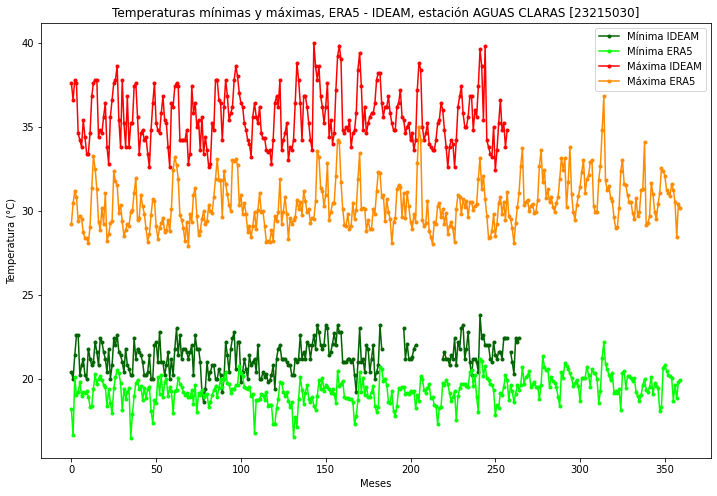

---------------------------
Climatología


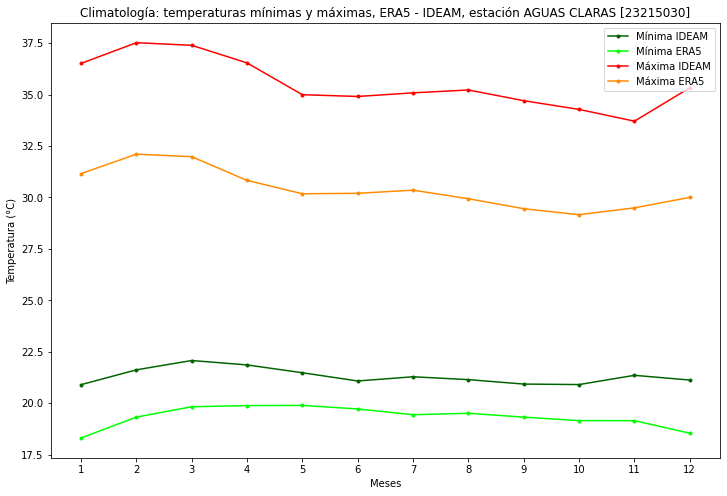

----------------------------------
NUBE DE PUNTOS


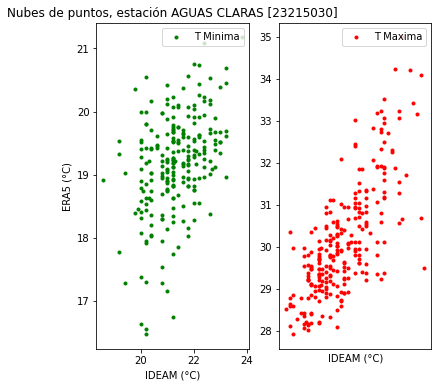

DATOS BRUTOS
-------------------------------------------


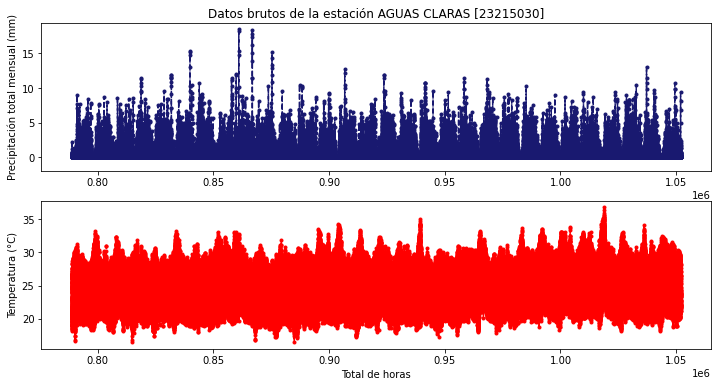

----------------------------------
CLIMATOLOGÍA


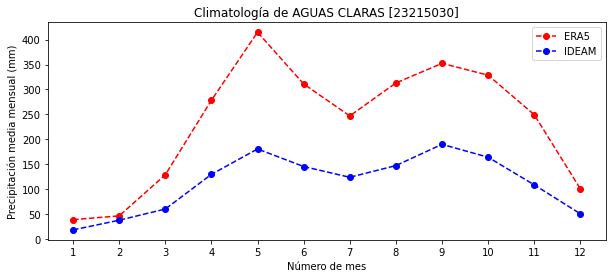

----------------------------------
NUBE DE PUNTOS


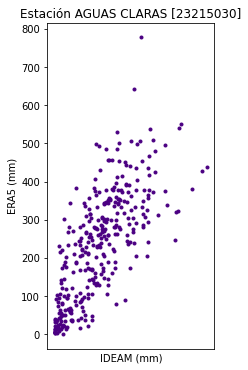

In [ ]:
temperatura('AguasClaras_1990-2019.xlsx')
precipitacion('AguasClaras_1990-2019.xlsx')

#**Estaciones**

In [ ]:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7


In [ ]:
df_stations = pd.read_excel('Libro_estaciones.xlsx')
df_stations

Codigo                                     Estacion  \
0   52055210                      BOTANA - AUT [52055210]   
1   21135050                          JULIA LA [21135050]   
2   21205710            JARDIN BOTANICO  - AUT [21205710]   
3   21205420                         TIBAITATA [21205420]   
4   26215020                       CANAFISANTO [26215020]   
5   23095010          AEROPUERTO PUERTO BERRIO [23095010]   
6   23155040                         CENTRO EL [23155040]   
7   23195040  UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]   
8   27045020                            CASERI [27045020]   
9   23215030                      AGUAS CLARAS [23215030]   
10  16015040                      SANTA ISABEL [16015040]   
11  48015050           AEROPUERTO VASQUEZ COBO [48015050]   
12  47075010                       LA CHORRERA [47075010]   
13  47045010                  PUERTO LEGUIZAMO [47045010]   
14  42075010                              MITU [42075010]   
15  44035030                          MACAGUAL [44035030]   
16  46015030     SAN VICENTE DEL CAGUAN  - AUT [46015030]   
17  32155010                        MAPIRIPANA [32155010]   
18  31095030              PUERTO INIRIDA - AUT [31095030]   
19  51035010             AEROPUERTO LA FLORIDA [51035010]   
20  54075020                       BAJO CALIMA [54075020]   
21  54085010                           NOANAMA [54085010]   
22  54025010                   SAN JOSE PALMAR [54025010]   
23  11045010              AEROPUERTO EL CARANO [11045010]   
24  56015010                      PANAMERICANA [56015010]   
25  11125010                       TERESITA LA [11125010]   
26  12025040                       TURBO - AUT [12025040]   
27  12025030                        MELLITO EL [12025030]   
28  13085050                 LORICA  ITA - AUT [13085050]   
29  25025002                  LOS ALAMOS - AUT [25025002]   
30  28035040                         GUAYMARAL [28035040]   
31  14015030                ESCUELA NAVAL CIOH [14015030]   
32  29045120                        FLORES LAS [29045120]   
33  15015060                SAN LORENZO  - AUT [15015060]   
34  15075030                           MANAURE [15075030]   
35  32075060                    COOPERATIVA LA [32075060]   
36  34015010                      LAS GAVIOTAS [34015010]   
37  35225030                     MODULOS - AUT [35225030]   
38  35215020            AEROPUERTO YOPAL - AUT [35215020]   
39  38015030         AEROPUERTO PUERTO CARRENO [38015030]   
40  36025010                              TAME [36025010]   
41  37045010                   SARAVENA  - AUT [37045010]   
42  37055010        AEROPUERTO SANTIAGO PÃ‰REZ [37055010]   
43  57025020                     GORGONA GUAPI [57025020]   
44  57015010                   MALPELO  - AUT  [57015010]   
45  14015060                 ISLAS DEL ROSARIO [14015060]   
46  17015010       AEROPUERTO SESQUICENTENARIO [17015010]   
47  17025020             AEROPUERTO EL EMBRUJO [17025020]   

                Departamento                    Municipio  Identificador  \
0                     Nariño                        Pasto              0   
1                      Huila                        Neiva              0   
2               Cundinamarca                       Bogota              0   
3               Cundinamarca                     Mosquera              0   
4                  Antioquia        Santa_Fe_De_Antioquia              0   
5                  Antioquia                Puerto_Berrio              0   
6                  Santander              Barrancabermeja              0   
7                  Santander                  Bucaramanga              0   
8                      Cauca                      Cucasia              0   
9                      Cesar                    Aguachica              0   
10        Norte_de_Santander                       Cucuta              0   
11                  Amazonas                      Leticia              1   
12                  Amazonas

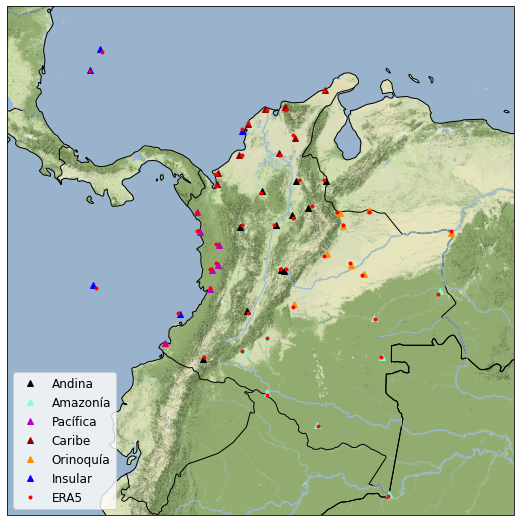

In [ ]:
#Definición del DF para cada Región Natural:
#Región Andina
andina = df_stations.loc[df_stations['Identificador']==0]
lat_andina,lon_andina = andina['lat'],andina['lon']

#Región Amazonía
amazonia = df_stations.loc[df_stations['Identificador']==1]
lat_amazonia,lon_amazonia = amazonia['lat'],amazonia['lon']

#Región Pacífica
pacifica = df_stations.loc[df_stations['Identificador']==2]
lat_pacifica,lon_pacifica = pacifica['lat'],pacifica['lon']

#Región Caribe
caribe = df_stations.loc[df_stations['Identificador']==3]
lat_caribe,lon_caribe = caribe['lat'],caribe['lon']

#Región Orinoquía
orinoquia = df_stations.loc[df_stations['Identificador']==4]
lat_orinoquia,lon_orinoquia = orinoquia['lat'],orinoquia['lon']

#Región Insular
insular = df_stations.loc[df_stations['Identificador']==5]
lat_insular,lon_insular = insular['lat'],insular['lon']


# descargar topografía y fronteras
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_image(tiler,9)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)

#Andina
ax.plot(lon_andina,lat_andina,'^',color='k',label='Andina',transform=ccrs.Geodetic())

#Amazonía
ax.plot(lon_amazonia,lat_amazonia,'^',color='aquamarine',label='Amazonía',transform=ccrs.Geodetic())

#Pacífica
ax.plot(lon_pacifica,lat_pacifica,'^',color='m',label='Pacífica',transform=ccrs.Geodetic())

#Caribe
ax.plot(lon_caribe,lat_caribe,'^',color='darkred',label='Caribe',transform=ccrs.Geodetic())

#Orinoquía
ax.plot(lon_orinoquia,lat_orinoquia,'^',color='darkorange',label='Orinoquía',transform=ccrs.Geodetic())

#Insular
ax.plot(lon_insular,lat_insular,'^',color='blue',label='Insular',transform=ccrs.Geodetic())


#Nearest point
ax.plot(df_stations['lon_E'],df_stations['lat_E'],'.r',label='ERA5',transform=ccrs.Geodetic())
plt.legend(loc=3, prop={'size': 12})
plt.show()

Text(0.5, 1.0, 'Diferencia en grados*1000 del ERA5 en el punto más cercano a las estaciones IDEAM')

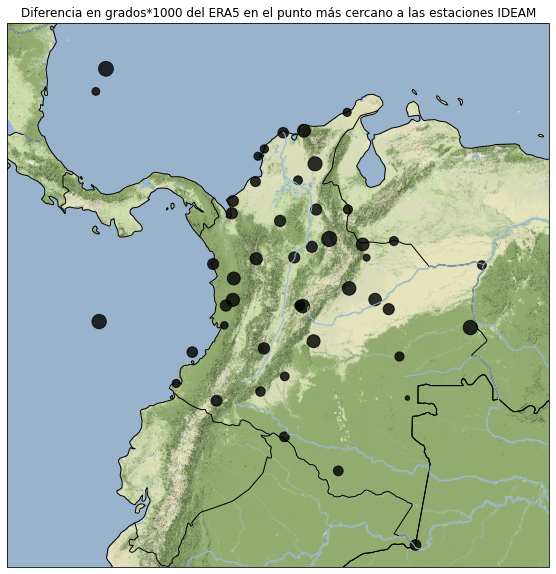

In [ ]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1, projection=proj)
ax.add_image(tiler,9)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax  = fig.add_subplot(111,projection=proj)
ax.set_extent([-85, -65, -5, 15])
im1 = plt.scatter(x=df_stations['lon'], y=df_stations['lat'],
            color="black",
            s=df_stations['diferencia']*1000,
            alpha=0.8,
            transform=ccrs.PlateCarree())
ax.set_title('Diferencia en grados*1000 del ERA5 en el punto más cercano a las estaciones IDEAM')

#**Mapas de Correlación de Pearson**

##**Precipitación**

Text(0.5, 1.0, 'Ampliado en 1000 veces absoluto del coeficiente Pearson: Precipitación')

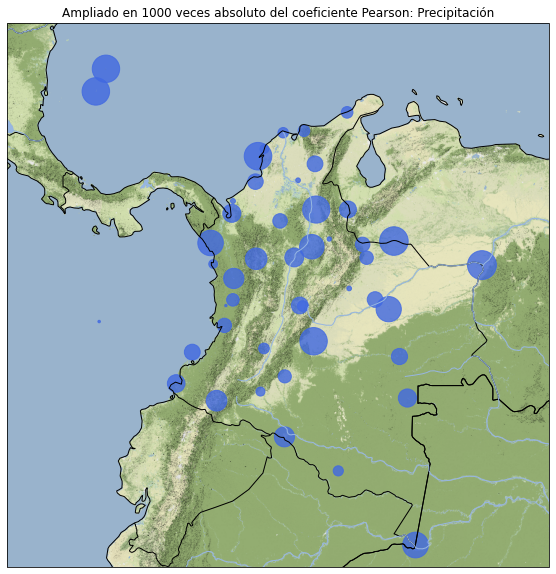

In [ ]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1, projection=proj)
ax.add_image(tiler,9)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax  = fig.add_subplot(111,projection=proj)
ax.set_extent([-85, -65, -5, 15])
im1 = plt.scatter(x=df_stations['lon'], y=df_stations['lat'],
            s=np.abs(df_stations['corr_p'])*1000,
            color='royalblue',
            alpha=0.8,
            transform=ccrs.PlateCarree())
ax.set_title('Ampliado en 1000 veces absoluto del coeficiente Pearson: Precipitación')

#**Temperatura Mínima**

Text(0.5, 1.0, 'Ampliado en 1000 veces absoluto del coeficiente Pearson: T Minima')

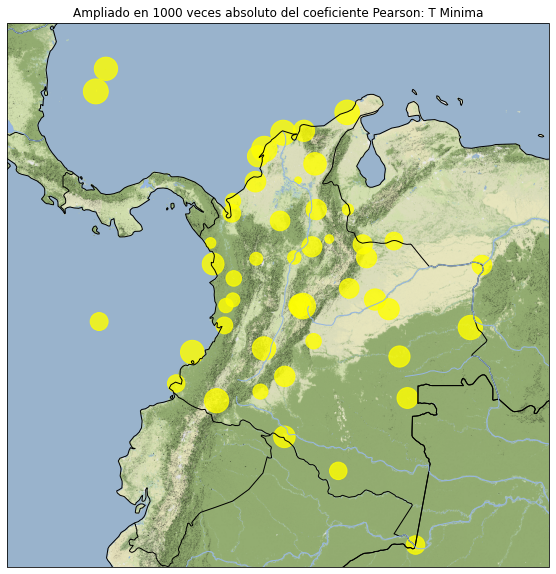

In [ ]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1, projection=proj)
ax.add_image(tiler,9)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax  = fig.add_subplot(111,projection=proj)
ax.set_extent([-85, -65, -5, 15])
im1 = plt.scatter(x=df_stations['lon'], y=df_stations['lat'],
            s=np.abs(df_stations['corr_min'])*1000,
            color = 'yellow',
            alpha=0.8,
            transform=ccrs.PlateCarree())
ax.set_title('Ampliado en 1000 veces absoluto del coeficiente Pearson: T Minima')

#**Temperatura Máxima**

Text(0.5, 1.0, 'Ampliado en 1000 veces absoluto del coeficiente Pearson: T Maxima')

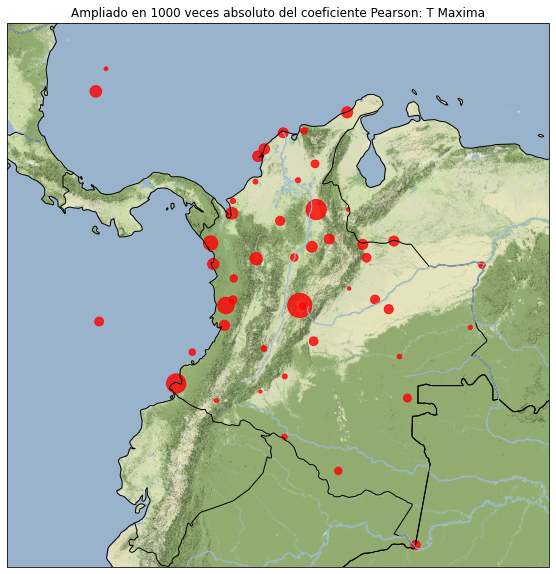

In [ ]:
proj = ccrs.Mercator()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1, projection=proj)
ax.add_image(tiler,9)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax  = fig.add_subplot(111,projection=proj)
ax.set_extent([-85, -65, -5, 15])
im1 = plt.scatter(x=df_stations['lon'], y=df_stations['lat'],
            s=np.abs(df_stations['corr_max'])*1000,
            color='red',
            alpha=0.8,
            transform=ccrs.PlateCarree())
ax.set_title('Ampliado en 1000 veces absoluto del coeficiente Pearson: T Maxima')

#**Seaborn**

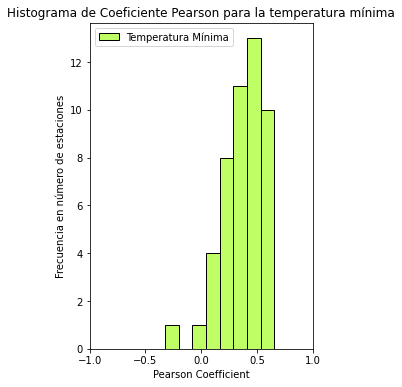

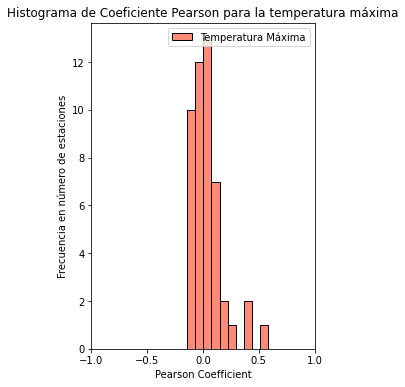

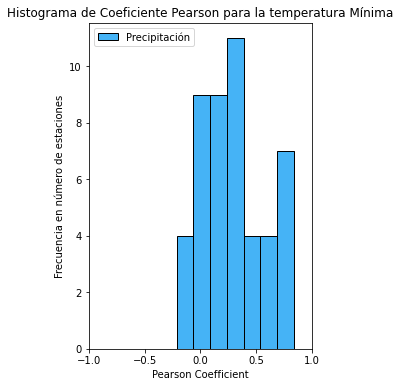

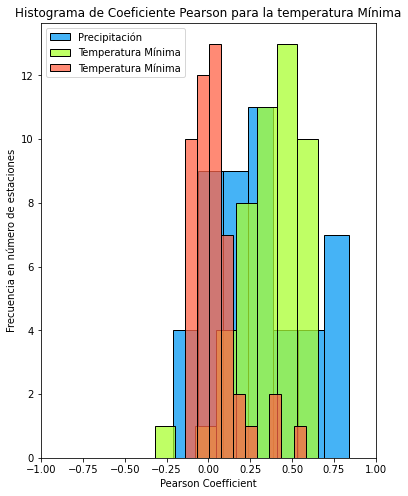

In [ ]:
fig,ax1 = plt.subplots(1, 1, figsize=(4,6))
ax1 = sns.histplot(df_stations['corr_min'],stat='count',color='#AAFF32',label='Temperatura Mínima')
ax1.set_title("Histograma de Coeficiente Pearson para la temperatura mínima")
ax1.set_ylabel('Frecuencia en número de estaciones')
ax1.set_xlabel('Pearson Coefficient')
ax1.set_xlim(-1,1)
ax1.legend()
plt.show()

#--2
fig,ax2 = plt.subplots(1, 1, figsize=(4,6))
ax2 = sns.histplot(df_stations['corr_max'],stat='count',color='#FF6347',label='Temperatura Máxima')
ax2.set_title("Histograma de Coeficiente Pearson para la temperatura máxima")
ax2.set_ylabel('Frecuencia en número de estaciones')
ax2.set_xlabel('Pearson Coefficient')
ax2.legend()
ax2.set_xlim(-1,1)
plt.show()

#--3
fig,ax3 = plt.subplots(1, 1, figsize=(4,6))
ax3 = sns.histplot(df_stations['corr_p'],stat='count',color='#069AF3',label='Precipitación')
ax3.set_title("Histograma de Coeficiente Pearson para la temperatura Mínima")
ax3.set_ylabel('Frecuencia en número de estaciones')
ax3.set_xlabel('Pearson Coefficient')
ax3.legend()
ax3.set_xlim(-1,1)
plt.show()

#--TODAS
fig,ax4 = plt.subplots(1, 1, figsize=(6,8))
sns.histplot(df_stations['corr_p'],stat='count',color='#069AF3',label='Precipitación')
sns.histplot(df_stations['corr_min'],stat='count',color='#AAFF32',label='Temperatura Mínima')
sns.histplot(df_stations['corr_max'],stat='count',color='#FF6347',label='Temperatura Mínima')
ax4.set_title("Histograma de Coeficiente Pearson para la temperatura Mínima")
ax4.set_ylabel('Frecuencia en número de estaciones')
ax4.set_xlabel('Pearson Coefficient')
ax4.set_xlim(-1,1)
ax4.legend()
plt.show()

#**BoxPlot**

Text(0.5, 1.0, 'Boxplot Correlación Pearson')

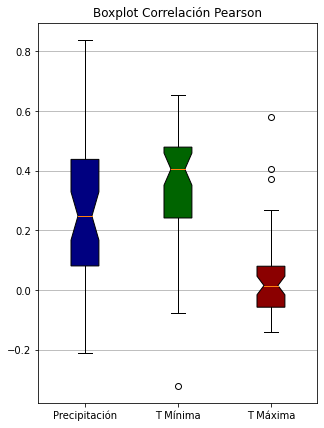

In [ ]:
labels = ['Precipitación', 'T Mínima', 'T Máxima']
data = [df_stations['corr_p'],df_stations['corr_min'],df_stations['corr_max']]
fig,ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 7))
ax1.yaxis.grid()
# rectangular box plot
bplot1 = ax1.boxplot(data,
                     notch=True,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
colors = ['navy','darkgreen', 'darkred']
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)
ax1.set_title('Boxplot Correlación Pearson')

#**ANDINA**

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA


TEMPERATURAS
-------------------------------------------


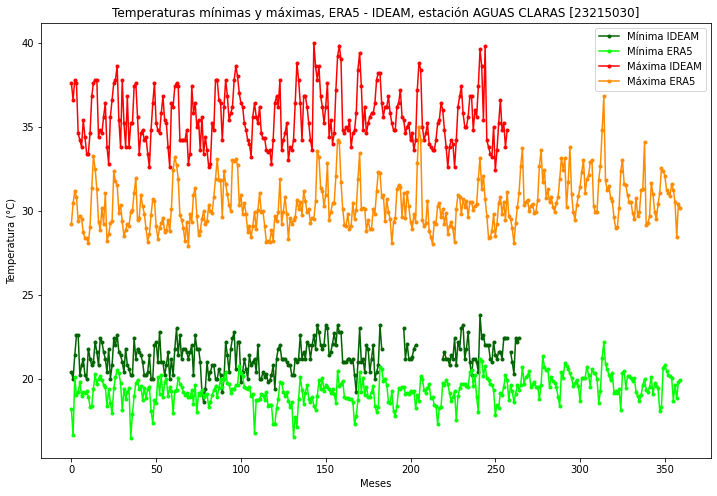

---------------------------
Climatología


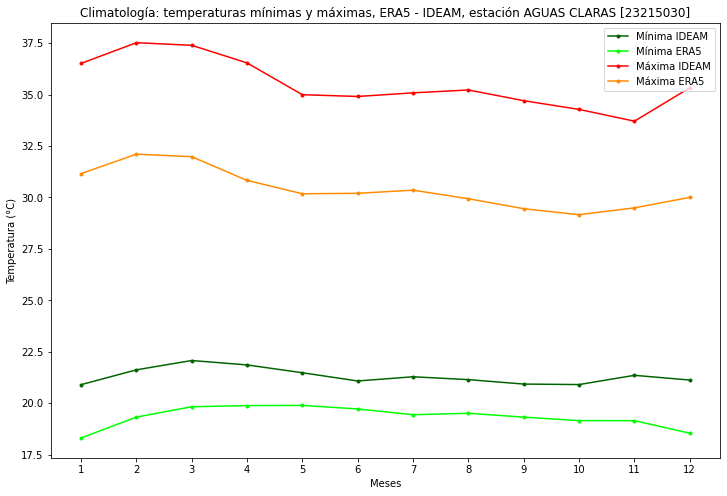

----------------------------------
NUBE DE PUNTOS


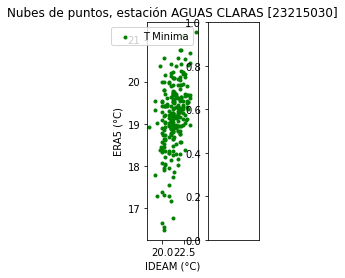

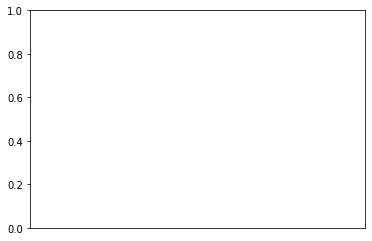

In [ ]:
temperatura('AguasClaras_1990-2019.xlsx')

In [ ]:
precipitacion('AguasClaras_1990-2019.xlsx')
precipitacion('APuertoBerrio_1990-2019.xlsx')
precipitacion('Botana_1990-2019.xlsx')
precipitacion('Canafisanto_1990-2019.xlsx')
precipitacion('Cesari_1990-2019.xlsx')
precipitacion('ElCentro_1990-2019.xlsx')
precipitacion('JardinBotanico_1990-2019.xlsx')
precipitacion('LaJulia_1990-2019.xlsx')
precipitacion('SantaIsabel_1990-2019.xlsx')
precipitacion('Tibaitata_1990-2019.xlsx')
precipitacion('UIS_1990-2019.xlsx')
#--2
temperatura('AguasClaras_1990-2019.xlsx')
temperatura('APuertoBerrio_1990-2019.xlsx')
temperatura('Botana_1990-2019.xlsx')
temperatura('Canafisanto_1990-2019.xlsx')
temperatura('Cesari_1990-2019.xlsx')
temperatura('ElCentro_1990-2019.xlsx')
temperatura('JardinBotanico_1990-2019.xlsx')
temperatura('LaJulia_1990-2019.xlsx')
temperatura('SantaIsabel_1990-2019.xlsx')
temperatura('Tibaitata_1990-2019.xlsx')
temperatura('UIS_1990-2019.xlsx')

Output hidden; open in https://colab.research.google.com to view.

#**AMAZONÍA**

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA


In [ ]:
df = pd.read_excel('Leticia_1990-2019.xlsx',sheet_name='Temperatura')
name = df['NombreEstacion'][0]
#------
#MÍNIMAS:
df['Fecha_Maxima'] = pd.to_datetime(df['Fecha_Maxima'], format='%Y-%m')
df['Fecha_Minima'] = pd.to_datetime(df['Fecha_Minima'], format='%Y-%m')
start = df['Fecha_Minima'][0]
# result = [start]
# #Rango de horas
# for i in range(1, len(df['Fecha_Minima'])):
#     start += td(seconds=3600)
#     result.append(start)
# #df de prueba
# prueba = pd.DataFrame({'dates': result})
df['Año'] = df['Fecha_Minima'].dt.year
df['Meses'] = df['Fecha_Minima'].dt.month
min = []
for i in df.groupby([('Año'),('Meses')])['Minima'].min():
  min.append(i)
print(min)
#-------    
# MÁXIMAS:
start = df['Fecha_Maxima'][0]
result = [start]
#Rango de horas
for i in range(1, len(df['Fecha_Maxima'])):
    start += td(seconds=3600)
    result.append(start)
#df de prueba
prueba = pd.DataFrame({'dates': result})
df['Año'] = df['Fecha_Minima'].dt.year
df['Meses'] = df['Fecha_Minima'].dt.month
max = []
for i in df.groupby([('Año'),('Meses')])['Maxima'].max():
  max.append(i)
print(max)
df['Min'] = pd.Series(min)
df['Max'] = pd.Series(max)
cor_min = df['Min'].corr(df['Era5_Minima'],method='pearson')
cor_max = df['Max'].corr(df['Era5_Maxima'],method='pearson')
print('Corr_Min',cor_min)
print('Corr_Max',cor_max)

[22.0, 20.9, 21.4, 20.5, 20.2, 15.2, 16.8, 16.8, 21.4, 20.5, 21.4, 21.5, 21.6, 21.5, 21.4, 21.2, 18.8, 17.6, 16.7, 19.6, 20.7, 21.2, 22.2, 21.6, 22.4, 21.7, 21.5, 22.1, 21.0, 16.0, 19.8, 20.3, 20.8, 21.8, 21.4, 21.6, 21.2, 21.8, 20.2, 20.2, 16.9, 14.8, 19.3, 19.6, 20.2, 20.0, 21.8, 20.9, 21.8, 20.9, 21.8, 16.5, 17.4, 18.8, 21.0, 21.1, 21.5, 20.7, 21.8, 21.0, 21.5, 20.8, 19.8, 17.4, 18.2, 19.2, 18.0, 21.0, 21.9, 20.6, 21.7, 21.4, 20.8, 21.1, 21.4, 14.3, 14.6, 20.9, 19.2, 21.0, 21.6, 21.2, 20.8, 21.2, 21.8, 19.8, 21.3, 21.2, 19.3, 18.7, 21.6, 22.2, 22.6, 22.2, 22.4, 23.4, 23.0, 23.0, 20.1, 20.0, 20.4, 20.7, 19.0, 21.2, 22.0, 21.2, 22.0, 21.4, 21.6, 18.4, 20.5, 20.6, 16.6, 14.6, 21.2, 20.9, 17.5, 20.4, 21.6, 21.4, 20.7, 21.2, 20.4, 19.0, 15.7, 17.3, 17.6, 20.3, 20.8, 20.4, 20.8, 21.3, 21.2, 21.4, 21.1, 14.9, 17.4, 19.0, 17.6, 20.8, 22.4, 20.8, 21.4, 22.0, 21.0, 20.8, 20.8, 18.9, 20.6, 20.2, 20.5, 21.0, 21.6, 21.9, 22.4, 21.6, 22.2, 21.3, 22.0, 21.0, 18.8, 17.2, 18.0, 21.6, 19.8, 21.8, 21.

In [ ]:
def corr(estacion):
  #PRECIPITACIÓN:
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = df['NombreEstacion'][0]
  name = str(name)
  print(name)
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m')
  start = df['Fecha'][0]
  result = [start]
  #Rango de horas
  for i in range(1, len(df['Fecha'])):
      start += td(seconds=3600)
      result.append(start)
  #df de prueba
  prueba = pd.DataFrame({'dates': result})
  df['Año'] = df['Fecha'].dt.year
  df['Meses'] = df['Fecha'].dt.month
  era_ = []
  for i in df.groupby([('Año'),('Meses')])['ERA5']:
    era_.append(i[1:])
  era = np.array(era_)
  ideam_ = []
  for i in df.groupby([('Año'),('Meses')])['IDEAM']:
    ideam_.append(i[1:])
  ideam = np.array(ideam_)
  #PRINTS
  corr_p = stats.pearsonr(ideam[:,0,0],era[:,0,0])

  #PEARSON CON PANDAS:
  corr_pp = df['IDEAM'].corr(df['ERA5'],method='pearson')

  # print('Sns corr_p',corr_p[0])
  print('Pandas corr_p',corr_pp)

  #TEMPERATURA:

  df = pd.read_excel(estacion,sheet_name='Temperatura')
  corr_tmin = df['Minima'].corr(df['Era5_Minima'],method='pearson')
  corr_tmax = df['Maxima'].corr(df['Era5_Maxima'],method='pearson')
  print('Pandas corr_tmin',corr_tmin)
  print('Pandas corr t_max',corr_tmax)
  print('---------------------------')
  return

In [ ]:
corr('Botana_1990-2019.xlsx')
corr('LaJulia_1990-2019.xlsx')
corr('JardinBotanico_1990-2019.xlsx')
corr('Tibaitata_1990-2019.xlsx')
corr('Canafisanto_1990-2019.xlsx')
corr('APuertoBerrio_1990-2019.xlsx')
corr('ElCentro_1990-2019.xlsx')
corr('UIS_1990-2019.xlsx')
corr('Cesari_1990-2019.xlsx')
corr('AguasClaras_1990-2019.xlsx')
corr('SantaIsabel_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
! pwd
corr('Leticia_1990-2019.xlsx')
corr('LaChorrera_1990-2019.xlsx')
corr('PuertoLeguizamo_1990-2019.xlsx')
corr('Mitu_1990-2019.xlsx')
corr('Macagual_1990-2019.xlsx')
corr('SanVicenteDelCaguan_1990-2019.xlsx')
corr('SanJoseGuaviare-2019.xlsx')
corr('PuertoInirida_1990-2019.xlsx')

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
AEROPUERTO VASQUEZ COBO [48015050]
Pandas corr_p 0.6102906288157909
Pandas corr_tmin 0.08573803598302648
Pandas corr t_max 0.16396058119165757
---------------------------
LA CHORRERA [47075010]
Pandas corr_p -0.1041184213701277
Pandas corr_tmin -0.05353207946607877
Pandas corr t_max -0.06985049748018043
---------------------------
PUERTO LEGUIZAMO [47045010]
Pandas corr_p 0.4053698461411102
Pandas corr_tmin -0.03143524143817409
Pandas corr t_max -0.017475865508200586
---------------------------
MITU [42075010]
Pandas corr_p 0.3318433039662456
Pandas corr_tmin 0.06226260741144615
Pandas corr t_max -0.03156614153488731
---------------------------
MACAGUAL [44035030]
Pandas corr_p 0.08217588555192254
Pandas corr_tmin 0.010165365014488656
Pandas corr t_max 0.011125020325124602
---------------------------
SAN VICENTE DEL CAGUAN  - AUT [46015030]
Pandas corr_p 0.17259

FileNotFoundError: ignored

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
! pwd
corr('ALaFlorida_1990-2019.xlsx')
corr('BajoCalima_1990-2019.xlsx')
corr('Noanama_1990-2019.xlsx')

In [ ]:
precipitacion('LaChorrera_1990-2019.xlsx')
precipitacion('Leticia_1990-2019.xlsx')
precipitacion('Macagual_1990-2019.xlsx')
precipitacion('Mitu_1990-2019.xlsx')
precipitacion('PuertoInirida_1990-2019.xlsx')
precipitacion('PuertoLeguizamo_1990-2019.xlsx')
precipitacion('SanJoseDelGuaviare_1990-2019.xlsx')
precipitacion('SanVicenteDelCaguan_1990-2019.xlsx')
#--2
temperatura('LaChorrera_1990-2019.xlsx')
temperatura('Leticia_1990-2019.xlsx')
temperatura('Macagual_1990-2019.xlsx')
temperatura('Mitu_1990-2019.xlsx')
temperatura('PuertoInirida_1990-2019.xlsx')
temperatura('PuertoLeguizamo_1990-2019.xlsx')
temperatura('SanJoseDelGuaviare_1990-2019.xlsx')
temperatura('SanVicenteDelCaguan_1990-2019.xlsx')

Output hidden; open in https://colab.research.google.com to view.

#**CARIBE**

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE


In [ ]:
precipitacion('ElMellito_1990-2019.xlsx')
precipitacion('EscuelaNavalCIOH_1990-2019.xlsx')
precipitacion('Guaymaral_1990-2019.xlsx')
precipitacion('LasFlores_1990-2019.xlsx')
precipitacion('Lorica_1990-2019.xlsx')
precipitacion('LosAlamos_1990-2019.xlsx')
precipitacion('Manaure_1990-2019.xlsx')
precipitacion('SanLorenzo_1990-2019.xlsx')
precipitacion('Turbo_1990-2019.xlsx')
#--2
temperatura('ElMellito_1990-2019.xlsx')
temperatura('EscuelaNavalCIOH_1990-2019.xlsx')
temperatura('Guaymaral_1990-2019.xlsx')
temperatura('LasFlores_1990-2019.xlsx')
temperatura('Lorica_1990-2019.xlsx')
temperatura('LosAlamos_1990-2019.xlsx')
temperatura('Manaure_1990-2019.xlsx')
temperatura('SanLorenzo_1990-2019.xlsx')
temperatura('Turbo_1990-2019.xlsx')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df=pd.read_excel('LosAlamos_1990-2019.xlsx',sheet_name='Temperatura')

In [ ]:
from datetime import datetime
df['Fecha_Maxima'] = pd.to_datetime(df['Fecha_Maxima'], format='%Y-%m')
type(df['Fecha_Maxima'][0])

pandas._libs.tslibs.timestamps.Timestamp

#**INSULAR**

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR


DATOS BRUTOS
-------------------------------------------


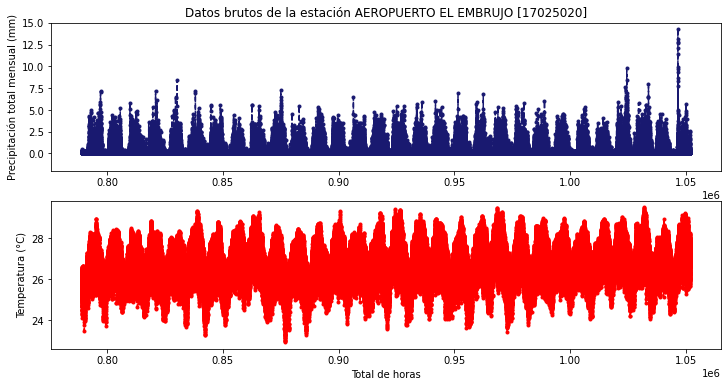

----------------------------------
CLIMATOLOGÍA


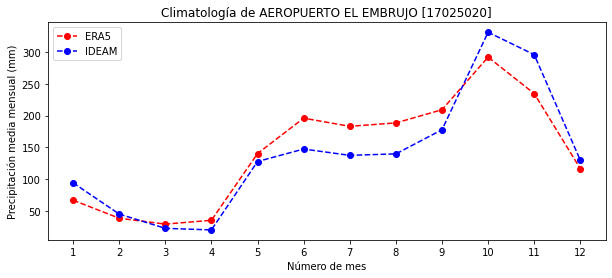

----------------------------------
NUBE DE PUNTOS


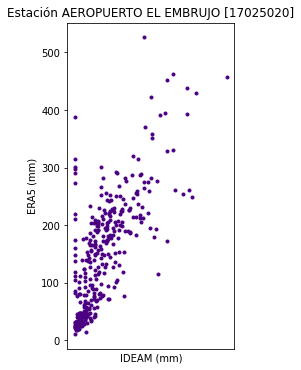

DATOS BRUTOS
-------------------------------------------


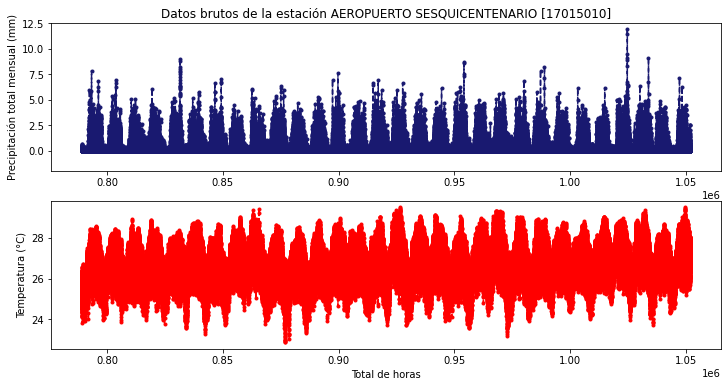

----------------------------------
CLIMATOLOGÍA


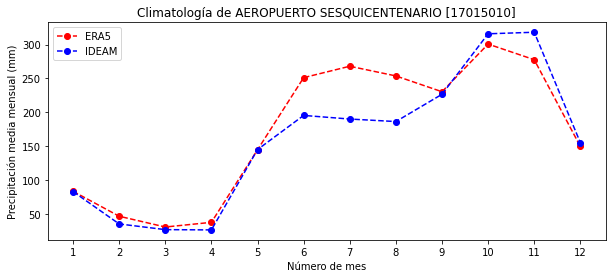

----------------------------------
NUBE DE PUNTOS


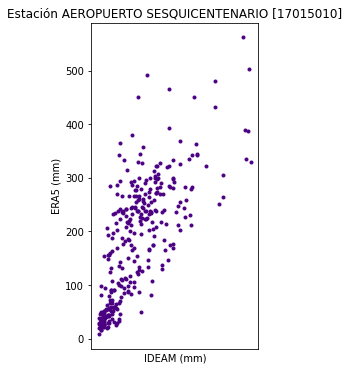

DATOS BRUTOS
-------------------------------------------


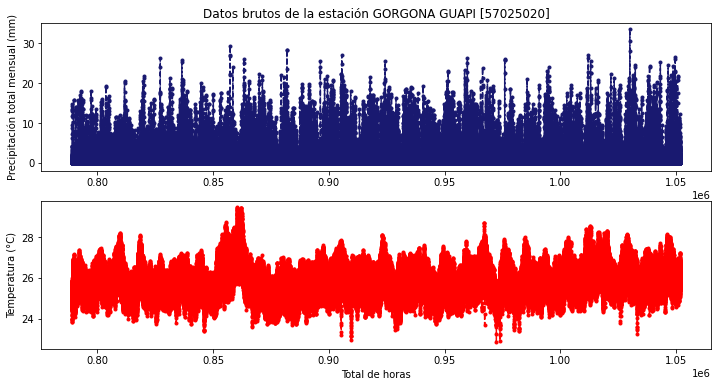

----------------------------------
CLIMATOLOGÍA


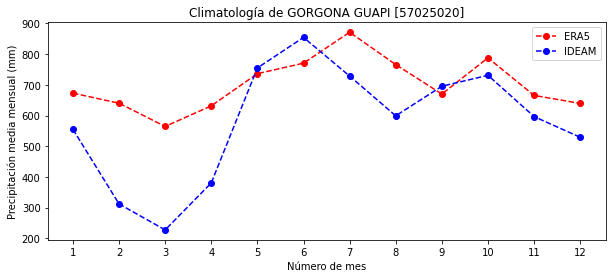

----------------------------------
NUBE DE PUNTOS


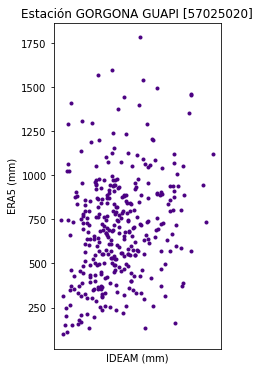

DATOS BRUTOS
-------------------------------------------


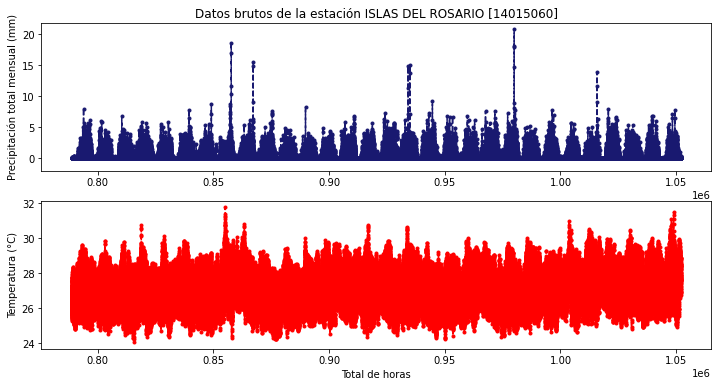

----------------------------------
CLIMATOLOGÍA


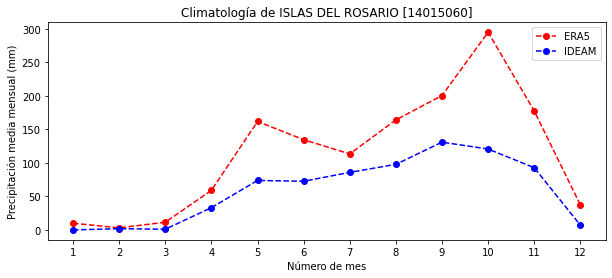

----------------------------------
NUBE DE PUNTOS


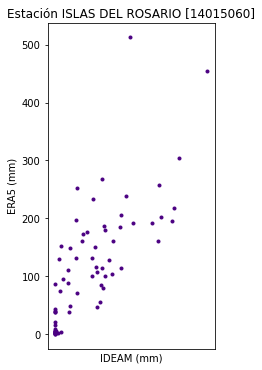

DATOS BRUTOS
-------------------------------------------


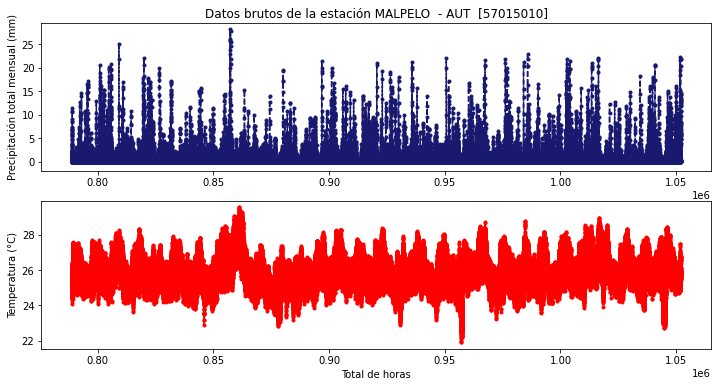

----------------------------------
CLIMATOLOGÍA


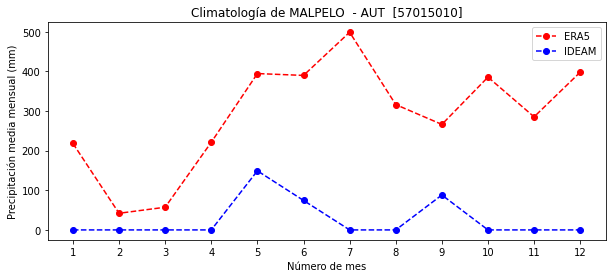

----------------------------------
NUBE DE PUNTOS


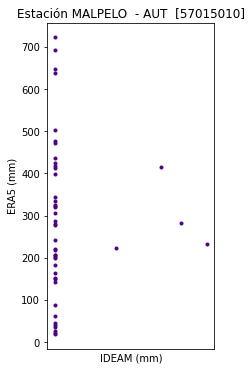

TEMPERATURAS
-------------------------------------------


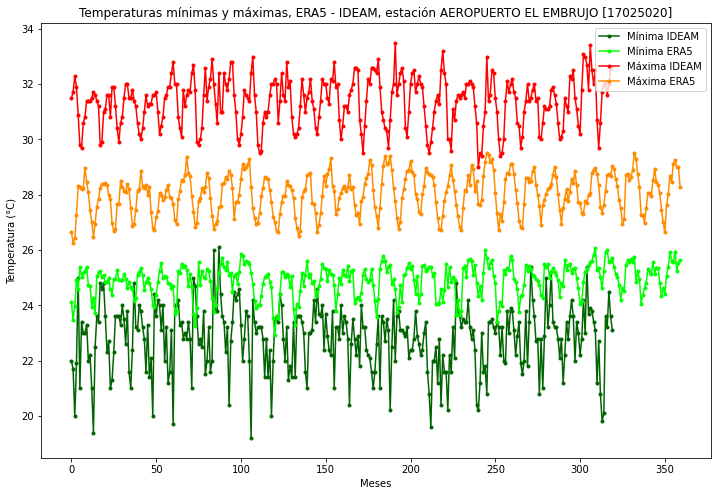

---------------------------
Climatología


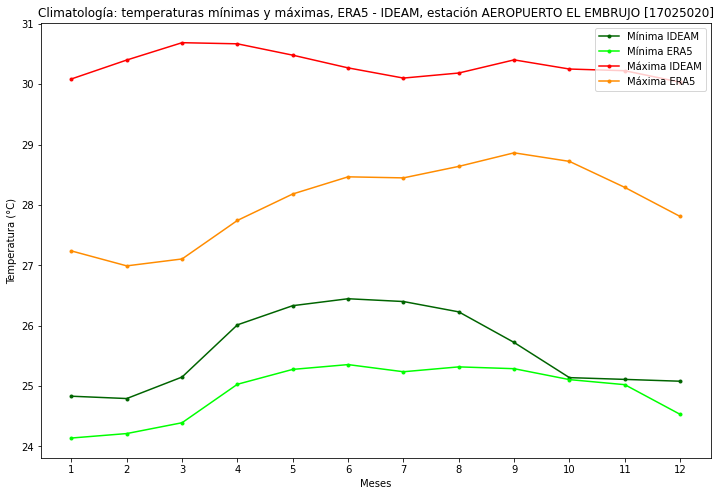

----------------------------------
NUBE DE PUNTOS


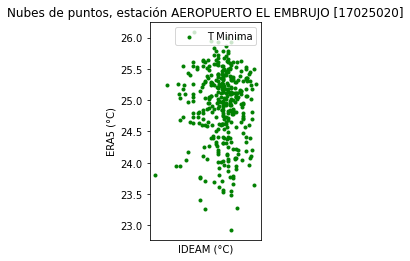

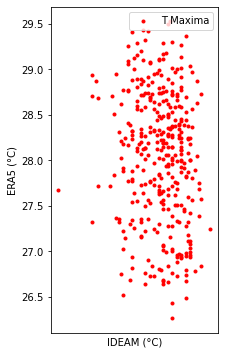

TEMPERATURAS
-------------------------------------------


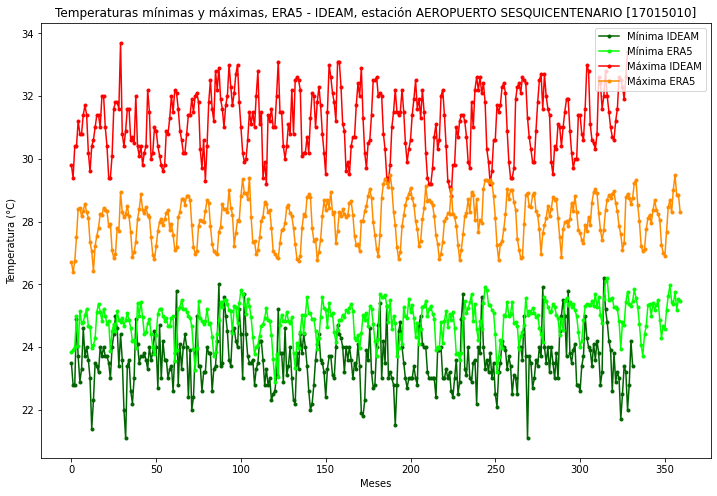

---------------------------
Climatología


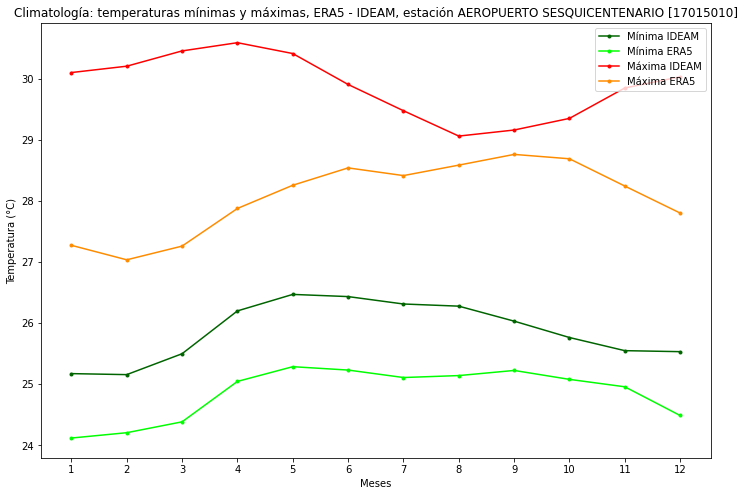

----------------------------------
NUBE DE PUNTOS


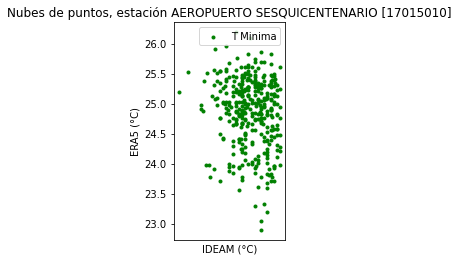

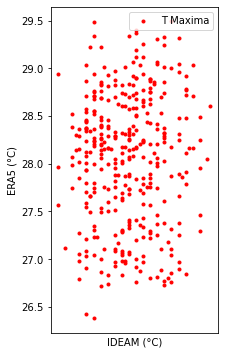

TEMPERATURAS
-------------------------------------------


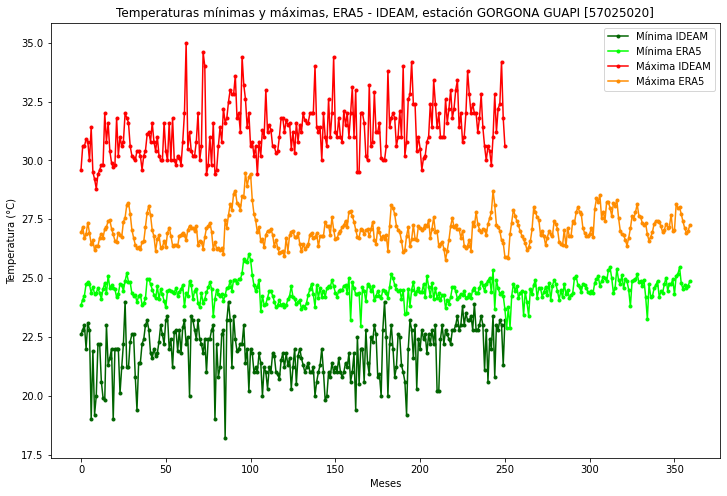

---------------------------
Climatología


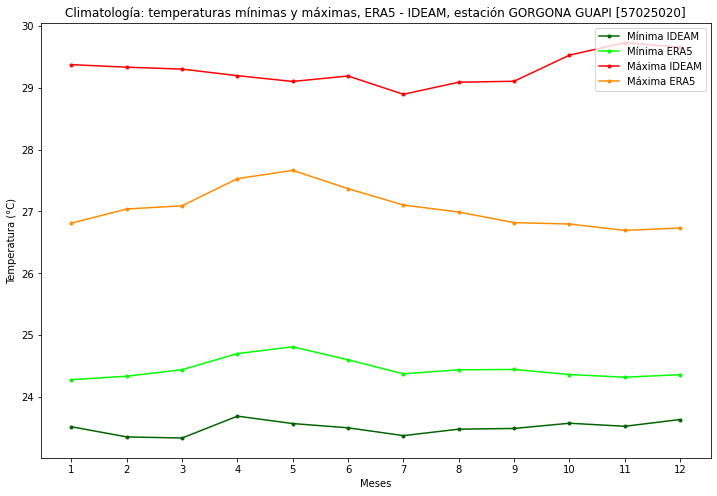

----------------------------------
NUBE DE PUNTOS


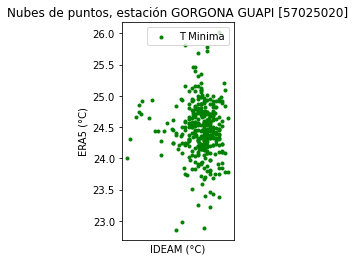

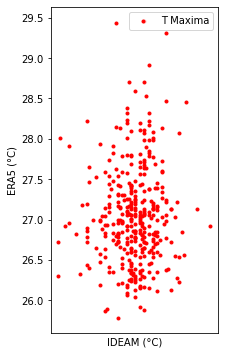

In [ ]:
precipitacion('AElEmbrujo_1990-2019.xlsx')
precipitacion('ASesquicentenario_1990-2019.xlsx')
precipitacion('Gorgona_1990-2019.xlsx')
precipitacion('IslasDelRosario_1990-2019.xlsx')
precipitacion('Malpelo_1990-2019.xlsx')
#--2
temperatura('AElEmbrujo_1990-2019.xlsx')
temperatura('ASesquicentenario_1990-2019.xlsx')
temperatura('Gorgona_1990-2019.xlsx')

#**PACIFICA**

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA


In [ ]:
precipitacion('AElCarnaro_1990-2019.xlsx')
precipitacion('ALaFlorida_1990-2019.xlsx')
precipitacion('BajoCalima_1990-2019.xlsx')
precipitacion('LaTeresita_1990-2019.xlsx')
precipitacion('Noanama_1990-2019.xlsx')
precipitacion('Panamericana_1990-2019.xlsx')
precipitacion('SanJosePalmar_1990-2019.xlsx')
#--2
temperatura('AElCarnaro_1990-2019.xlsx')
temperatura('BajoCalima_1990-2019.xlsx')
temperatura('LaTeresita_1990-2019.xlsx')
temperatura('Noanama_1990-2019.xlsx')
temperatura('Panamericana_1990-2019.xlsx')
temperatura('SanJosePalmar_1990-2019.xlsx')

Output hidden; open in https://colab.research.google.com to view.

#**ORINOQUÍA**

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA


In [ ]:
precipitacion('APuertoCarreno_1990-2019.xlsx')
precipitacion('ASantiagoPerez_1990-2019.xlsx')
precipitacion('AYopal_1990-2019.xlsx')
precipitacion('LaCooperativa_1990-2019.xlsx')
precipitacion('LasGaviotas_1990-2019.xlsx')
precipitacion('Modulos_1990-2019.xlsx')
precipitacion('Saravena_1990-2019.xlsx')
precipitacion('Tame_1990-2019.xlsx')
#--2
temperatura('APuertoCarreno_1990-2019.xlsx')
temperatura('ASantiagoPerez_1990-2019.xlsx')
temperatura('AYopal_1990-2019.xlsx')
temperatura('LaCooperativa_1990-2019.xlsx')
temperatura('LasGaviotas_1990-2019.xlsx')
temperatura('Modulos_1990-2019.xlsx')
temperatura('Saravena_1990-2019.xlsx')
temperatura('Tame_1990-2019.xlsx')

Output hidden; open in https://colab.research.google.com to view.